In [22]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

# Чтобы картинки отображались в ячейках
%matplotlib inline

# Задаём рабочую папку
import os
#os.chdir(...)

In [23]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [24]:
# чтение данных
# header = 0, чтобы в нулевой строке были названия столбцов
# index_col = False, т.к. нет названий строк
AH = pd.read_csv("/content/AmesHousing.txt", sep ='\t', header = 0, index_col = False)

In [25]:
# Вывести первые 5 наблюдений
AH.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [26]:
# имена столбцов
AH.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [27]:
# размерность таблицы
AH.shape

(2930, 82)

In [28]:
# типы данных столбцов
# object возникает, когда в столбце данные разных типов
AH.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

**Описательные статистики**

Для количественных и категориальных данных разные описательные статистики.

NaN - не число. Возникает, например, если значение пропущено или его невозможно вычислить.

**Номинальная шкала**

count - общее число значений в столбце,

unique - число уникальных значений переменой,

top - мода, самое часто встречающееся значение

freq - частота самого частого значения



**Количественная шкала**

mean - среднее арифметическое

min, max - понятно

std - стандартное отклонение = корню из выборочной дисперсии

25%, 50%, 75% - квантили

**Выборочная квантиль**

Квантилью уровня p, p ∈ [0, 1], называется наблюдение x[|np + 1|].

Округление влево.

Смысл: это такое наблюдение, меньше которого "ровно" p*100% наблюдений.

Пример. При измерении уровня неравенства в стране можно использовать разность величин среднего дохода 10% самых богатых и 10% самых бедных граждан. Тогда доход богатых будет квантилью уровня 0.9, а доход бедных квантилью уровня 0.1.

**Квартили**

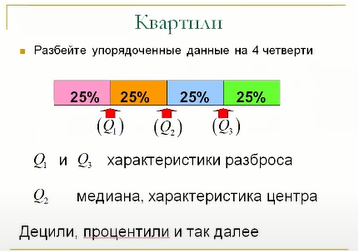

**Теоретическая квантиль**

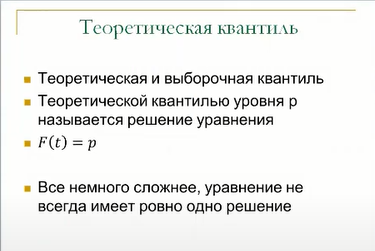

**Размах**

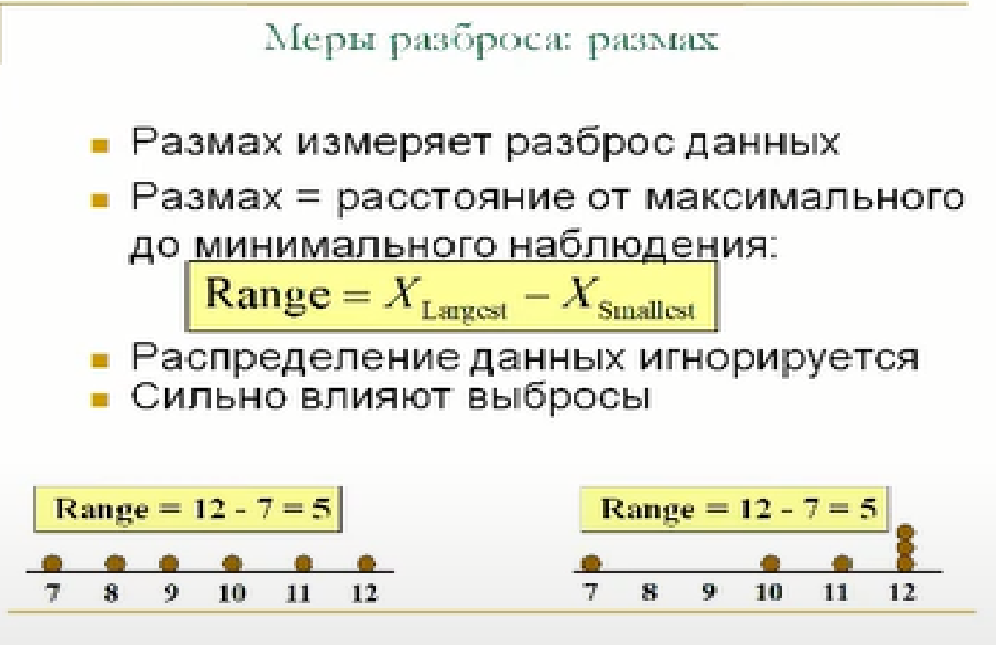

**Межквартильный размах**
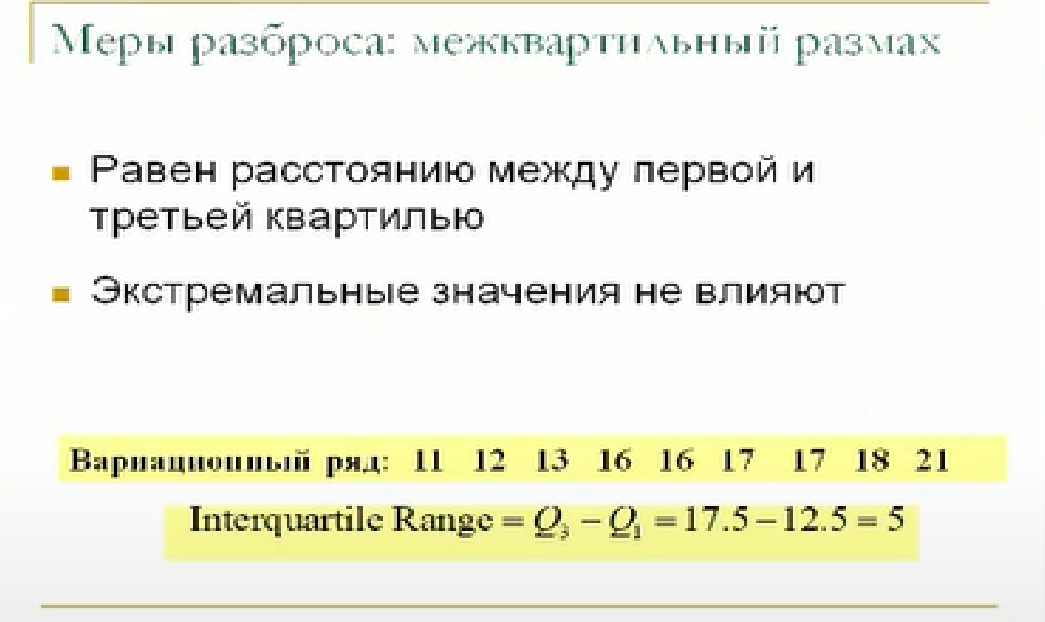

**Дисперсия**

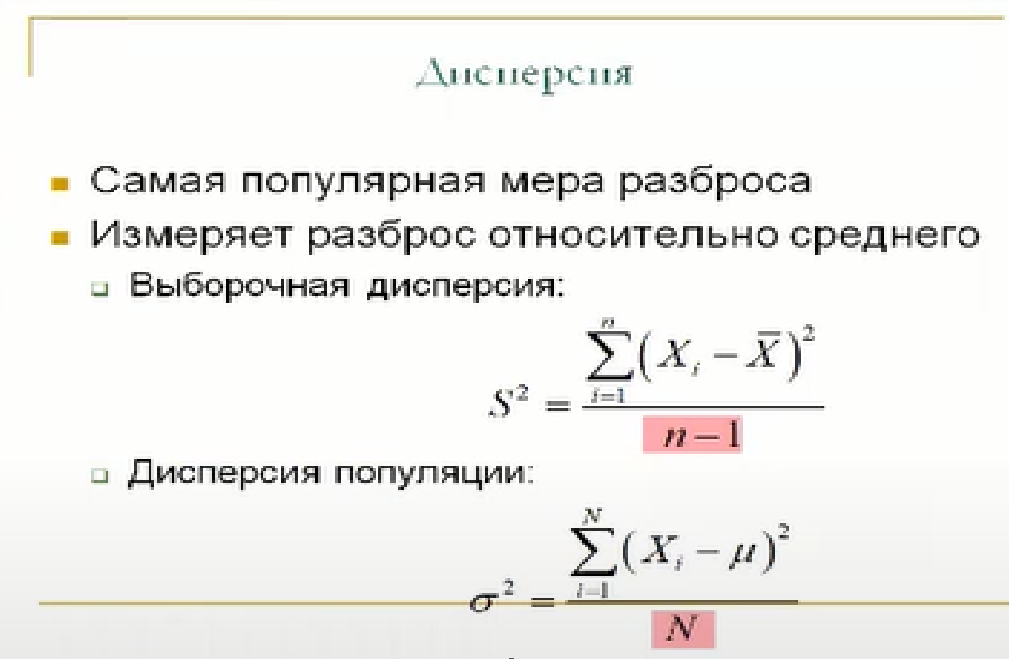

In [29]:
# Описательные статистики
AH.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


Объекты = наблюдения = строчки таблицы = дома

Столбцы = характеристики объёктов = переменные

Ames housing dataset

*   цены домов в Айове
*   2390 домов
*   характеристики дома и его цена
*   какая площадь дома, какой подъезд к дому, состояние дома,
есть ли гараж и т.д.
*   **цель - построение модели для определения цены дома**


In [30]:
# Описательные статистики для количественных переменных
AH.describe(include = [np.number])

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [31]:
# Описательные статистики для категориальных переменных
AH.describe(include = [np.object])

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [32]:
# Описательные статистики для результирующей переменной SalePrice
AH["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Гистограмма**

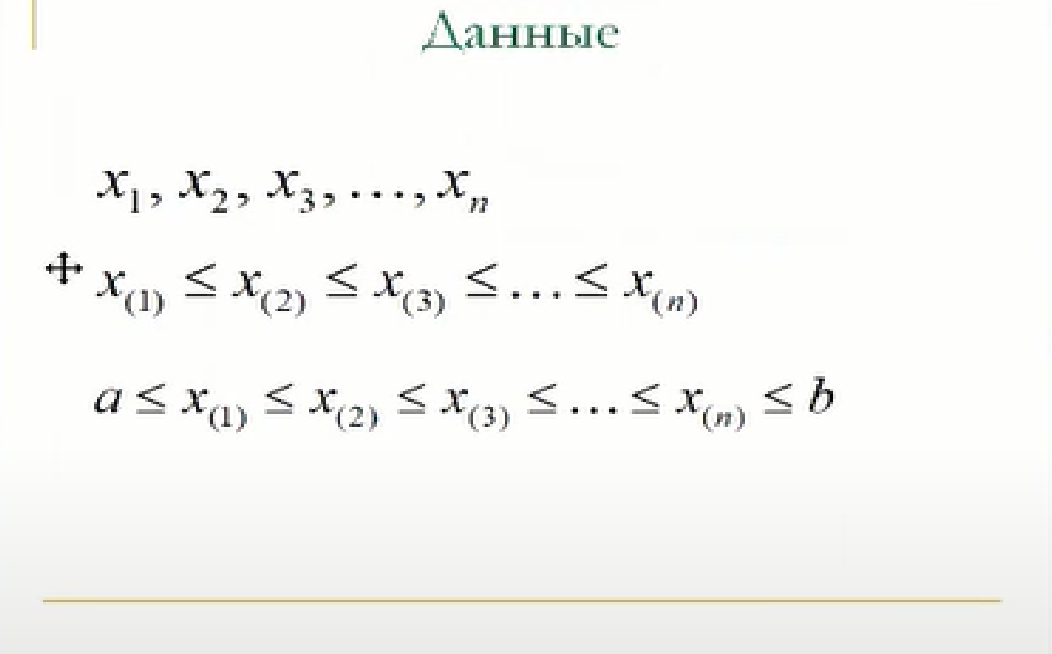

Обычно a = min, b = max

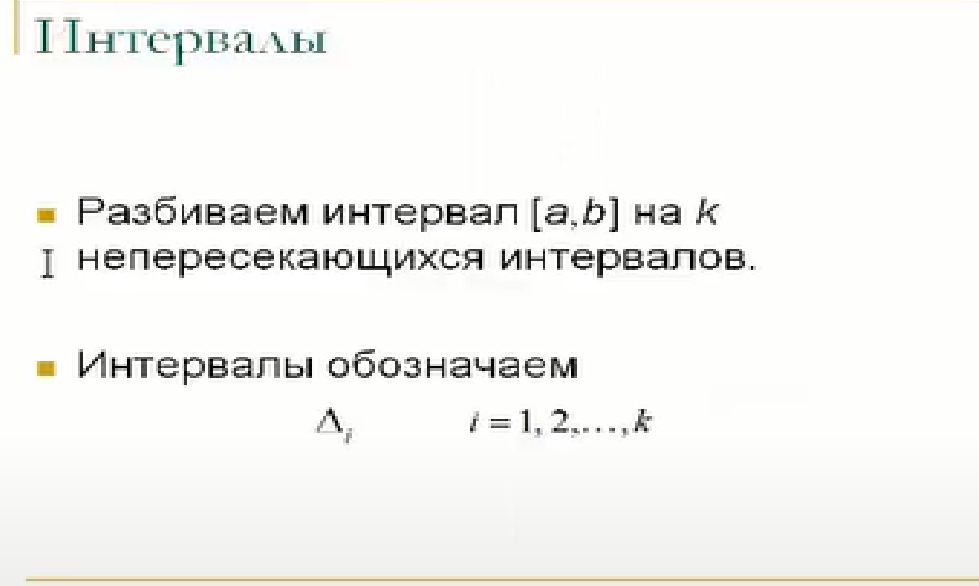

Обычно интервалы берутся одинаковой длины.

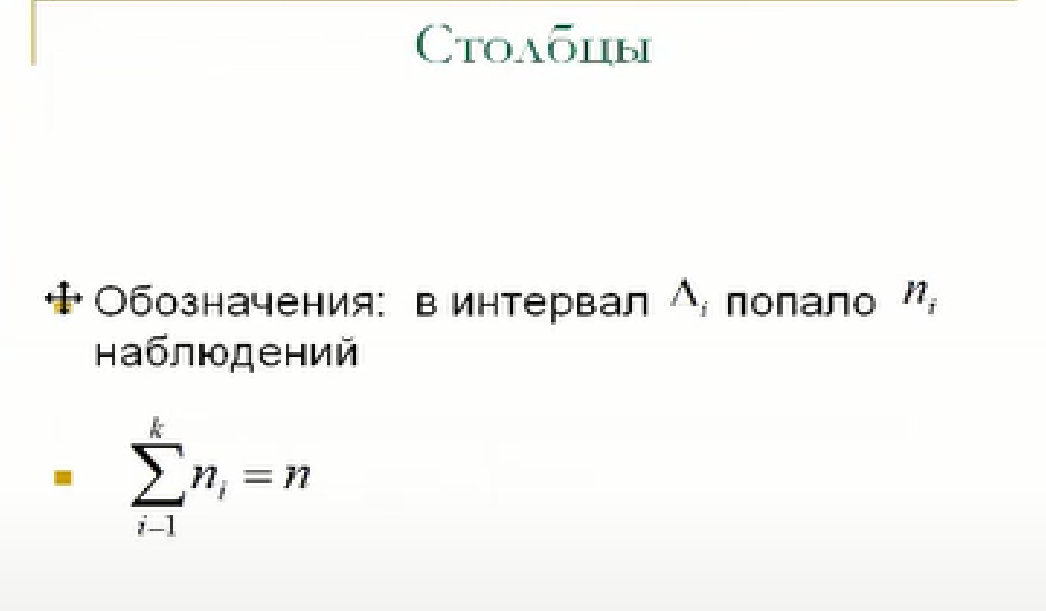

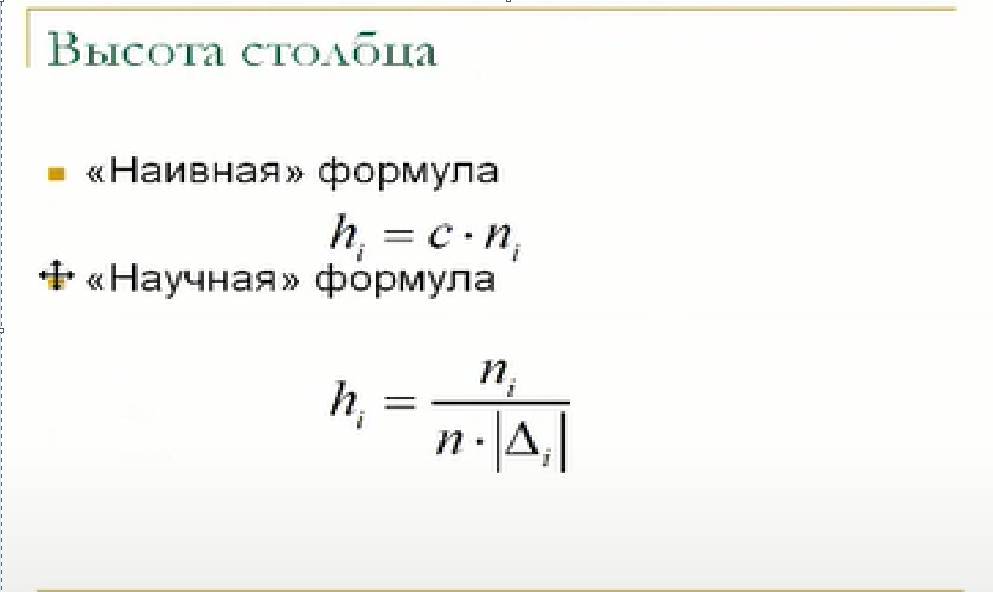

При использовании научной формулы площадь под графиком гистограммы равна 1. В этом случае гистограмма будет оценкой плотности распределения. А также такая нормировка позволит сравнивать гистограммы с разным числом наблюдений.

Пример гистограммы:

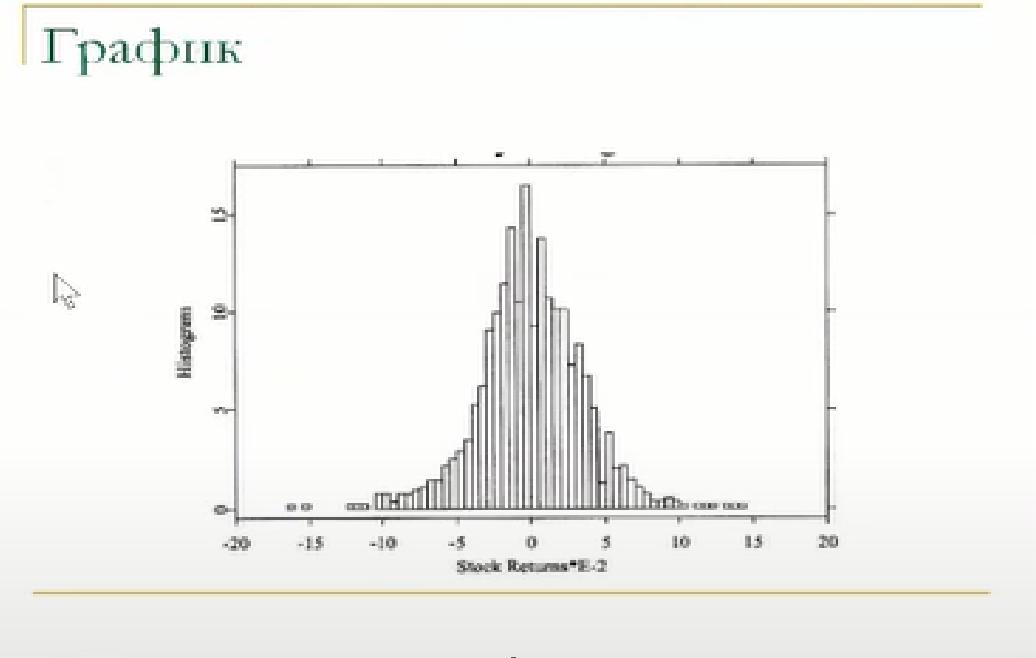

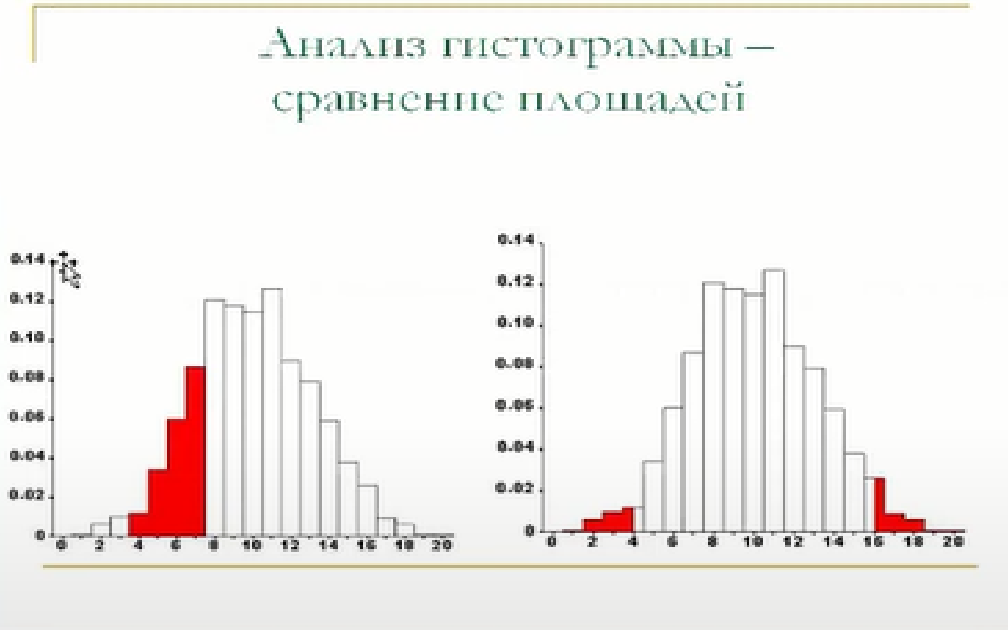

Число интервалов влияет на наше восприятие гистограммы:

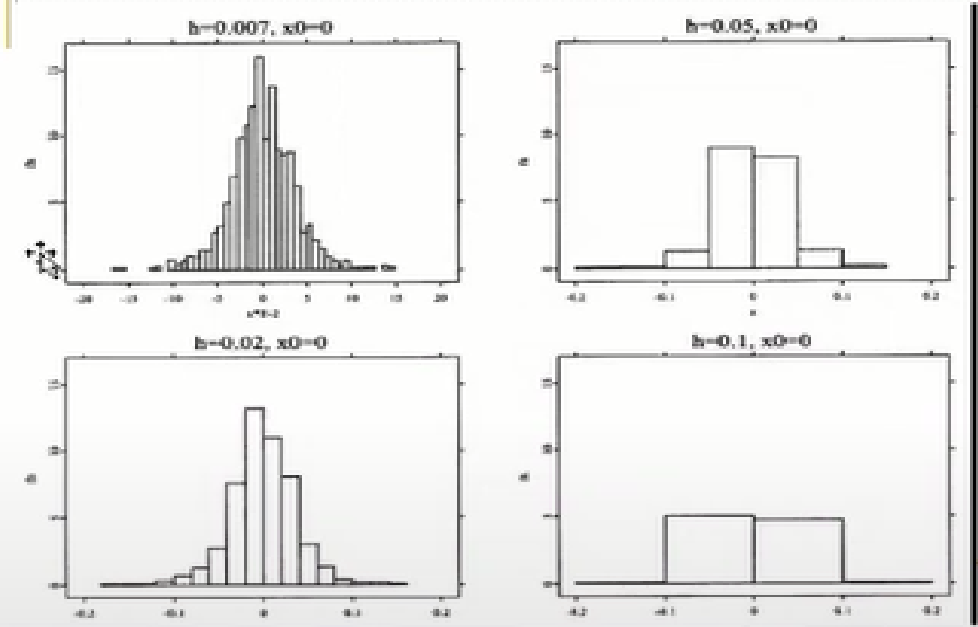

Также и выбор границ a и b:

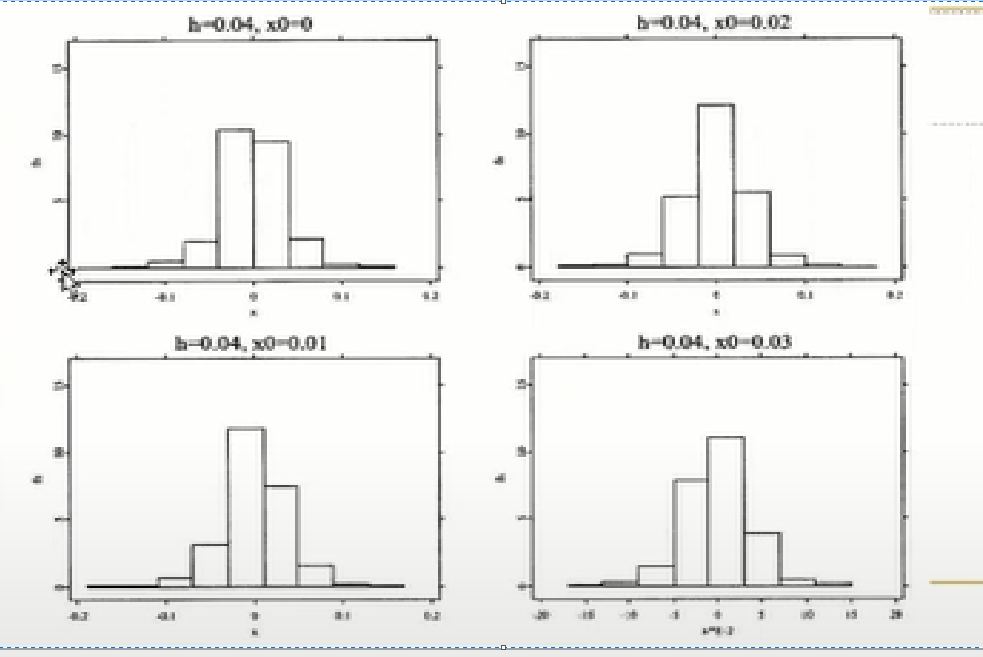

Поэтому стоит строить гистограммы с разным количеством столбцов.

**Польза гистограмм**

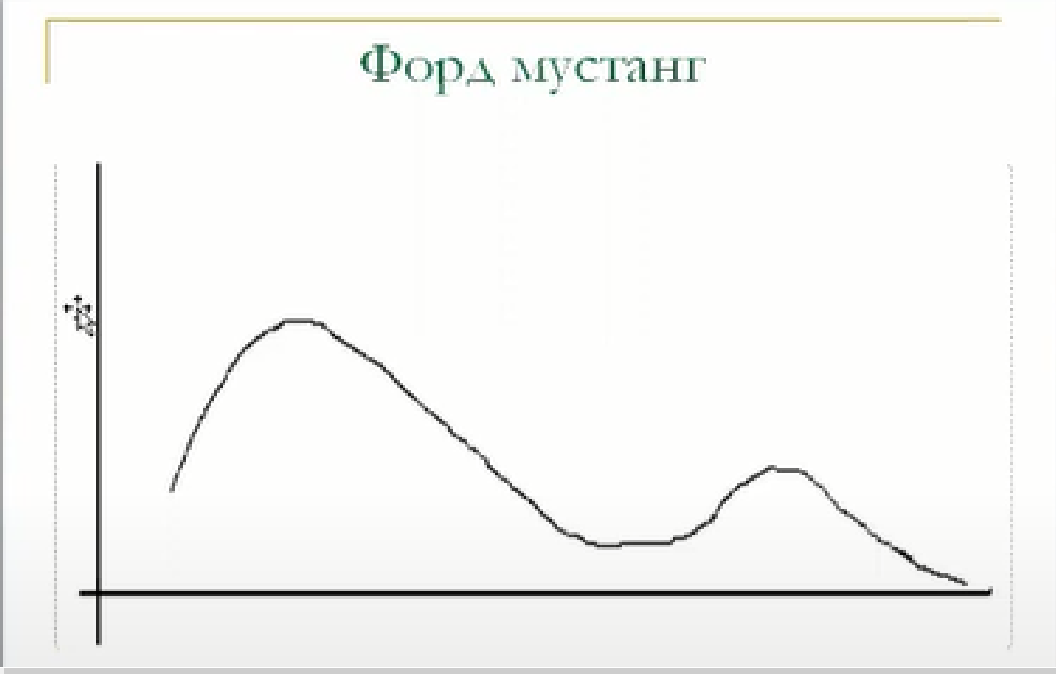

Компания Ford в 1960-х годах выпустила новый автомобиль Ford Mustang, который начал пользоваться большим спросом.

Автомобиль рекламировался как транспорт для энергичных, дерзких, молодых людей. Соответсвующий им пик находится слева.

Но благодаря гистограмме также обнаружился спрос и среди людей, которым было около сорока.

Так был выявлен новый покупательский сегмент, что повлияло на дальнейшее производство Мустангов и привело к увеличению прибыли.



**Воображаемая задача.**

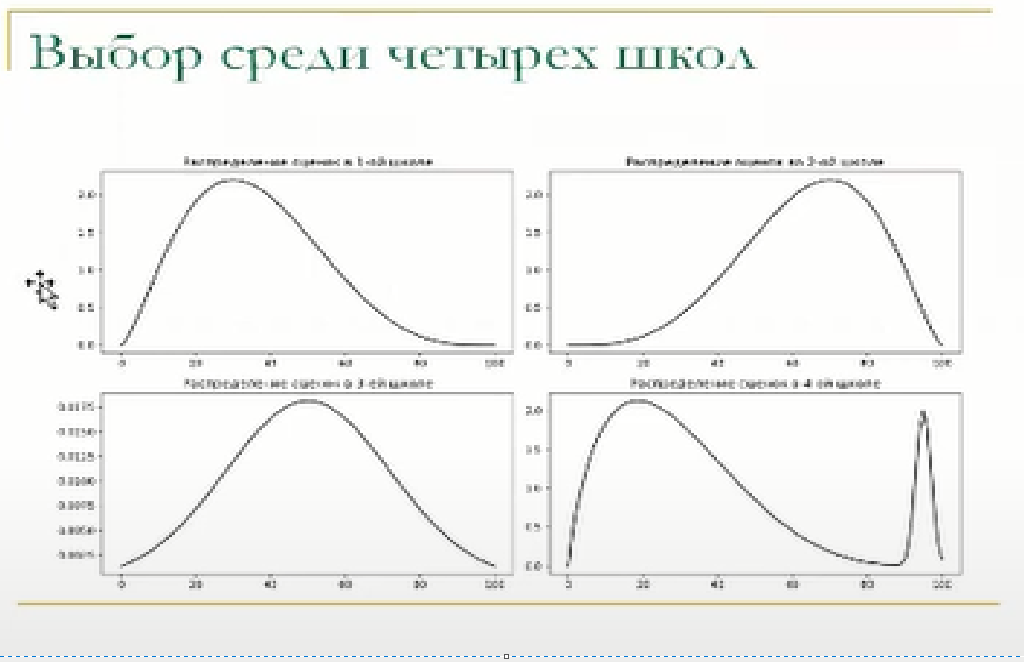

К вам домой пришли друзья детства родителей. Они купили квартиру в новом районе. Сына-восьмиклассника нужно переводить в новую школу.

Отец собирает информацию о школах и нашёл на сайте РАНО только картинки сверху. Мы говорим, что это гистограммы по результатам ЕГЭ, и он просит нас их объяснить.

Площадь каждой гистограммы равна 1.

В зависимости от мотивации сына друзей, его нужно отдать либо во вторую, либо в четвёртую школу.

Таким образом, гистограммы могут помочь вскрыть неожиданные особенности в данных. Поэтому их стоит строить всегда.

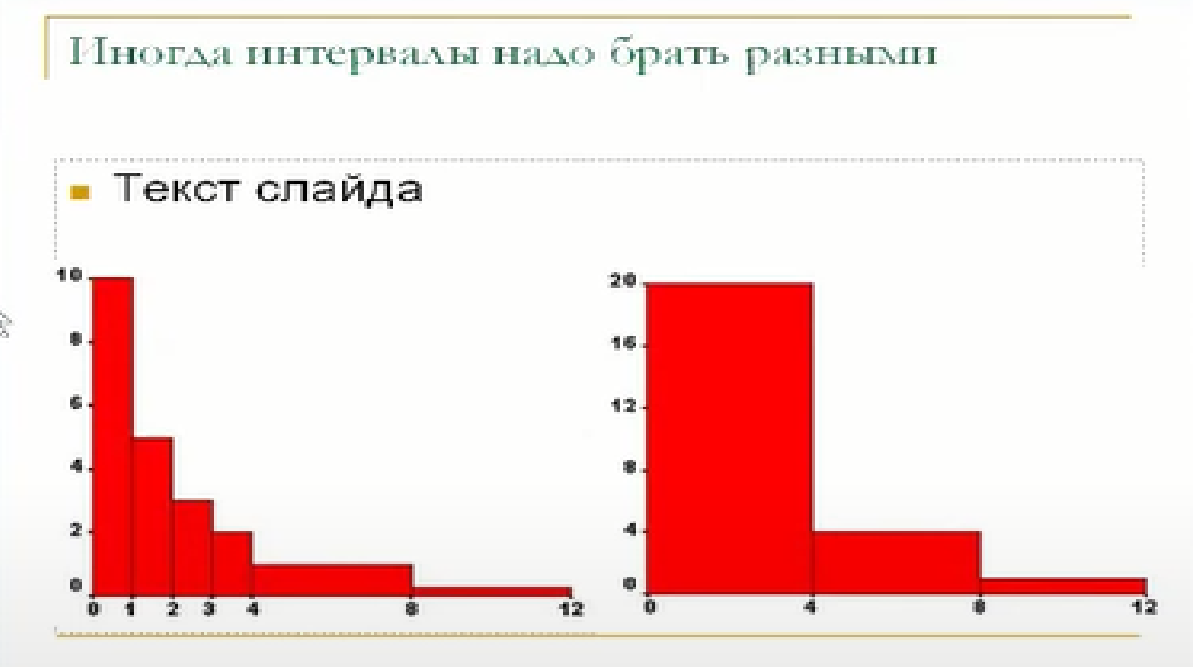

Если в интервал попало мало наблюдений, то он должен быть шире, а если много, то уже.